## **Arrays inside columns**

In [1]:
import pandas as pd

APP_NAME = 'pyspark_python'
MASTER = 'local[*]'
from pyspark import SparkConf
from pyspark.sql import SparkSession


conf = SparkConf().setAppName(APP_NAME)
conf = conf.setMaster(MASTER)
spark = SparkSession.builder.config(conf = conf).getOrCreate()
sc = spark.sparkContext

In [3]:
from pyspark.sql.functions import split
from pyspark.sql.functions import col
from pyspark.sql.types import *

schema = StructType([
    StructField("_c0",  StringType(), True),
     StructField("imp_sdopost",  StringType(), True)
])

trends = spark\
.read\
.schema(schema)\
.option("header", "true")\
.csv("data/trends.csv") 

trends.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- imp_sdopost: string (nullable = true)



In [4]:
trends = trends.withColumn("imp_sdopost", split(col("imp_sdopost"), ",")\
                           .cast("array<long>"))

In [5]:
trends.show()

+---+--------------------+
|_c0|         imp_sdopost|
+---+--------------------+
|  0|[, 2915, 2912, 28...|
|  1|[, 228, 228, 228,...|
+---+--------------------+



##  **rolling average**

In [56]:
from pyspark.sql import functions as F, Window

In [ ]:
# Order = -1
w = Window().partitionBy(*vars_key)\
.orderBy(F.col(trans_fields['trans_date']), F.col(trans_fields['cod_order']))
fictitious_trans_df = input_table_transactions_df.withColumn('aux_row_number', F.row_number().over(w)).where(F.col('aux_row_number') == 1).drop(F.col('aux_row_number'))

## **plots**

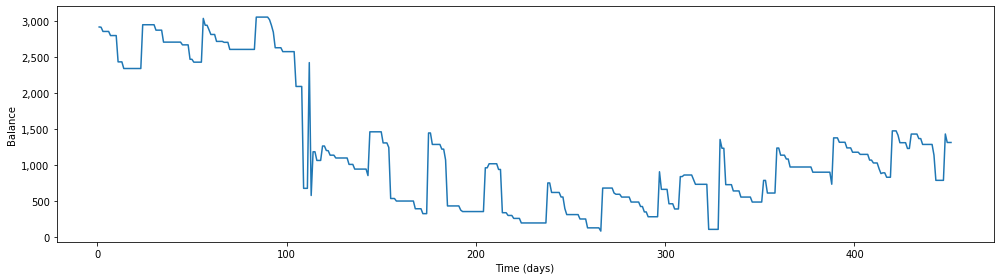

In [48]:
import matplotlib.pyplot as plt
import numpy as np
series = get_top_series(trends, 'imp_sdopost', n = 1)
    
for serie in series:
    my_plot(serie, xlabel="Time (days)", ylabel="Balance", format_yaxis=True)

In [ ]:
df.select(c).limit(n)

In [38]:
def get_top_series(df, c, n=10):
    """
    @Args:
        - df: dataframe to get the time series from
        - c: name of the column
        - n: number of elements to get
    @Computes:
        - numpy ndarray with the first n time series in the dataframe
    """
    
    return df.select(c).limit(n).toPandas()[c].values

In [41]:
def my_plot(y_values, x_values=None, xlabel=None, ylabel=None, format_xaxis=False, format_yaxis=False):
    """
    @Args:
        - y_values: Serie to plot
        - x_values: x-values of the serie to plot (default: None)
        - xlabel: label for the x-axis (default: None)
        - ylabel: label for the y-axis (default: None)
        - format_xaxis: True to print numbers with commas as thousands separators in the x-axis (default: False)
        - format_xaxis: True to print numbers with commas as thousands separators in the y-axis (default: False)
    @Computes:
        - plots the time series
    """
    
    plt.figure(figsize=[14, 4])
    if x_values != None:
        plt.plot(x_values, y_values)
    else:
        plt.plot(y_values)
    if xlabel != None:
        plt.xlabel(xlabel)
    if ylabel != None:
        plt.ylabel(ylabel)
    if format_xaxis:
        plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    if format_yaxis:
        plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.tight_layout()
    plt.show()